<a href="https://colab.research.google.com/github/sksaket/Association-rules-assignment/blob/main/Associations_rules_Books_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
book=pd.read_csv('/content/book.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


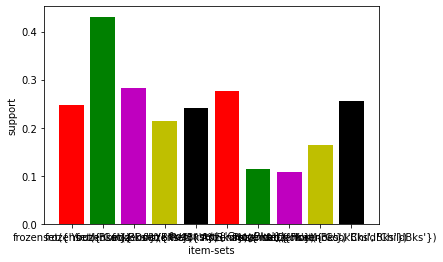

In [18]:
#Apriori Algorithm
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets=apriori(book,min_support=0.05,use_colnames=True,max_len=3)
plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('item-sets');plt.ylabel('support')

rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)

# To eliminate Redudancy in Rules

In [19]:
def to_list(i):
    return (sorted(list(i)))

In [20]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

In [21]:
ma_X = ma_X.apply(sorted)

In [22]:
rules_sets = list(ma_X)

In [23]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [24]:
# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

In [25]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
264,"(CookBks, GeogBks)",(ItalCook),0.1925,0.1135,0.0640,0.332468,2.929229,0.042151,1.328025
34,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
282,"(GeogBks, DoItYBks)",(ArtBks),0.1325,0.2410,0.0730,0.550943,2.286072,0.041067,1.690210
222,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
210,"(GeogBks, YouthBks)",(ArtBks),0.1205,0.2410,0.0650,0.539419,2.238253,0.035960,1.647919
252,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
162,"(CookBks, YouthBks)",(RefBks),0.1620,0.2145,0.0775,0.478395,2.230280,0.042751,1.505929
192,"(YouthBks, DoItYBks)",(ArtBks),0.1155,0.2410,0.0600,0.519481,2.155521,0.032164,1.579541
246,"(CookBks, GeogBks)",(RefBks),0.1925,0.2145,0.0890,0.462338,2.155420,0.047709,1.460954
186,"(RefBks, YouthBks)",(DoItYBks),0.0965,0.2820,0.0580,0.601036,2.131334,0.030787,1.799662
